In [1]:
import magpylib as magpy
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial.transform import Rotation as R

In [57]:
zeeman_prof = magpy.Collection()
j = 30
n = 8
a = 0# distance it circles aroundthe center 
c = 30 #angle of first bar
d =  30#angle of second bar(24)
b = -190# distnace the two section of the array are apart from each other
k = -100 #the first and second magnent are apart
e = 40
l = -10
p= -20# distance the thrid and 4th magnet are apart from each other
m  = -40
mystyle = mstyle = dict(
    mode="color+arrow",
    color=dict(north="magenta", middle="white", south="turquoise"),
    arrow=dict(width=2, color="k")
)
angles = np.linspace(0, 360, n, endpoint=False)
for i in angles:
    cube1= magpy.magnet.Cuboid(
    dimension=(6,6,125),
    polarization=(-(1.080),0,0),
    position=(70+a+l,0,140+k))
    cube2 = magpy.magnet.Cuboid(dimension= (4,4,25),
    polarization=(-1.17,0,0),
    position=(55+a+l,0,50+e),style_magnetization = mystyle)
    cube3= magpy.magnet.Cuboid(
    dimension=(6,6,125),
    polarization=(1.08,0,0),
    position=(91.5+m,0,320+b))
    cube4 = magpy.magnet.Cuboid(dimension= (4,4,25),
    polarization=(1.17,0,0),
    position=(140+a+p+m,0,90),)
  

#     cube5 = magpy.magnet.Cuboid(dimension= (4,4,25),
#     polarization=(-1.17,0,0),
#     position=(90+a+p+m,0,190))

#     cube6 = magpy.magnet.Cuboid(dimension= (4,4,25),
#     polarization=(-1.17,0,0),
#     position=(80+a+p+m,0,200),
# )
   


    cube1.rotate_from_angax(i, 'z')
    cube1.rotate_from_angax(c, 'y',)
    cube1.rotate_from_angax(i, 'z', anchor=0)
 
 
    cube2.rotate_from_angax(i, 'z',anchor = 0)
    cube2.rotate_from_angax(i, 'z')
    cube3.rotate_from_angax(i, 'z', anchor=0)
    cube3.rotate_from_angax(-d, 'y')
    cube3.rotate_from_angax(i, 'z')
  
    #cube4.rotate_from_angax(i, 'z', anchor=0)
    #cube4.rotate_from_angax(-d, 'y')
    #cube4.rotate_from_angax(i, 'z')
    # cube5.rotate_from_angax(i, 'z', anchor=0)
    # cube5.rotate_from_angax(i, 'z')
    # cube6.rotate_from_angax(i, 'z', anchor=0)
    # cube6.rotate_from_angax(i, 'z')

    zeeman_prof.add(cube1)
    zeeman_prof.add(cube2)
    zeeman_prof.add(cube3)
    #zeeman_prof.add(cube4)
    # zeeman_prof.add(cube5)
    # zeeman_prof.add(cube6)
    j = j+1
magpy.show(zeeman_prof.rotate_from_angax(0,'x'), backend='plotly',)



In [52]:
    quadpole_field = magpy.Collection()
    

In [58]:
Blab=  -57*1e-3
b_0L =  33*1e-3
L = 16
def mag(R,B_0,alpha,l):
    if R[0] > l:
       return  np.array([0,0,0])
    elif R[0] <=0:
        return np.array([0,0,0])
    else:
        return np.array([B_0 +alpha*(np.sqrt(1-R[0]/l)),0,0])

Text(0, 0.5, 'Magnetic field (mT)')

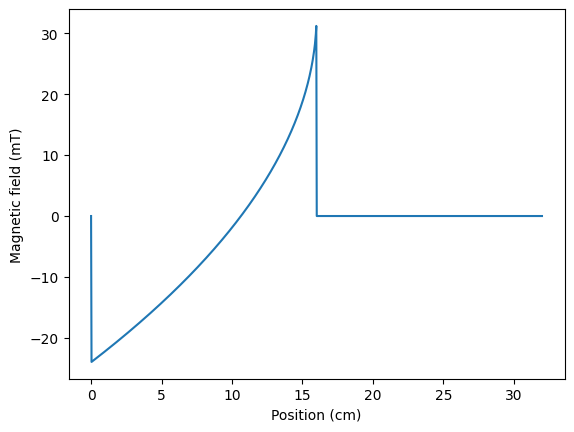

In [59]:
x= np.linspace(0,2*L,1000)
r = []
for i in x:
    r.append([i,0,0])
magg = []
for i in r:
    magg.append(mag(i,b_0L,Blab,L)[0])
plt.plot(x,np.array(magg)*1e3)
plt.xlabel('Position (cm)')
plt.ylabel('Magnetic field (mT)')

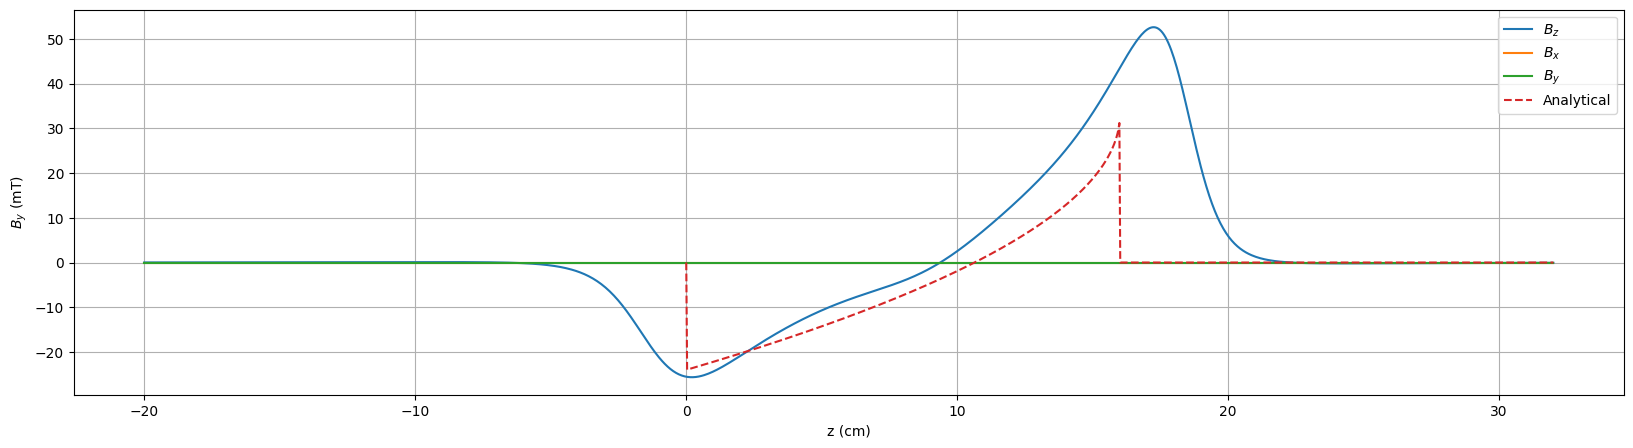

In [60]:
z = np.linspace(-200,320,1000)
b_y = []
b_z = []
b_x = []
for i in z:
    b_x.append(zeeman_prof.getB([0,0,i])[0])
    b_y.append(zeeman_prof.getB([0,0,i])[1])
    b_z.append(zeeman_prof.getB([0,0,i])[2])

fig,ax = plt.subplots(1,1,figsize=(20,5))    
plt.plot((z/10),np.array(b_x)*1e3)
plt.plot((z/10),np.array(b_y)*1e3)
plt.plot((z/10),np.array(b_z)*1e3)
#plt.yticks([-20,0,20,40])
#plt.xticks([-0.1,0,0.1,0.2,0.3,0.4])
plt.xlabel('z (cm)')
plt.plot(x,np.array(magg)*1e3, '--')

plt.ylabel('$B_z$ (mT)')
plt.legend(['$B_z$','$B_x$','$B_y$','Analytical'])  
plt.ylabel('$B_y$ (mT)')
plt.grid()

In [50]:
z = np.linspace(-200,320,1000)
b_y = []
b_z = []
b_x = []
b_y1 = []
b_z1 = []
b_x1 = []
for i in z:
    b_x.append(zeeman_prof.getB([0,0,i])[0] + cubee4.getB([0,0,i])[0])
    b_y.append(zeeman_prof.getB([0,0,i])[1] + cubee4.getB([0,0,i])[1])
    b_z.append(zeeman_prof.getB([0,0,i])[2] + cubee4.getB([0,0,i])[2])
    b_x1.append(cubee4.getB([0,0,i])[0])
    b_y1.append(cubee4.getB([0,0,i])[1])
    b_z1.append(cubee4.getB([0,0,i])[2])

    

fig,ax = plt.subplots(1,2,figsize=(20,5))    
ax[0].plot((z/10),np.array(b_x)*1e3)
ax[0].plot((z/10),np.array(b_y)*1e3)
ax[0].plot((z/10),np.array(b_z)*1e3)

ax[1].plot((z/10),np.array(b_x1)*1e3)
ax[1].plot((z/10),np.array(b_y1)*1e3)
ax[1].plot((z/10),np.array(b_z1)*1e3)
#plt.yticks([-20,0,20,40])
#plt.xticks([-0.1,0,0.1,0.2,0.3,0.4])
plt.xlabel('z (cm)')
ax[0].plot(x,np.array(magg)*1e3, '--')

plt.ylabel('$B_z$ (mT)')
plt.legend(['$B_z$','$B_x$','$B_y$','Analytical'])  
plt.ylabel('$B_y$ (mT)')
ax[0].grid()
ax[1].grid()

NameError: name 'cubee4' is not defined